In [ ]:
# # This file is part of Theano Geometry
#
# Copyright (C) 2017, Stefan Sommer (sommer@di.ku.dk)
# https://bitbucket.org/stefansommer/theanogemetry
#
# Theano Geometry is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.
#
# Theano Geometry is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU General Public License for more details.
#
# You should have received a copy of the GNU General Public License
# along with Theano Geometry. If not, see <http://www.gnu.org/licenses/>.
#

In [ ]:
%cd ..
from src.manifolds.S2 import *
M = S2()
print(M)

from src.plotting import *
# %matplotlib notebook

/home/line/Dropbox/theanogeometry


WARNING (theano.tensor.blas): We did not found a dynamic library into the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


2d sphere (ellipsoid parameters [ 1.  1.  1.], spherical_coords: False)


In [ ]:
# Riemannian structure
from src.Riemannian import metric
metric.initialize(M)

# element, tangent vector and covector
x = np.array([0.,0.])
v = np.array([-1.,-1.])
p = M.flatf(x,v)

print("x = ", x)
print("v = ", v)
print("p = ", p)

# Geodesic

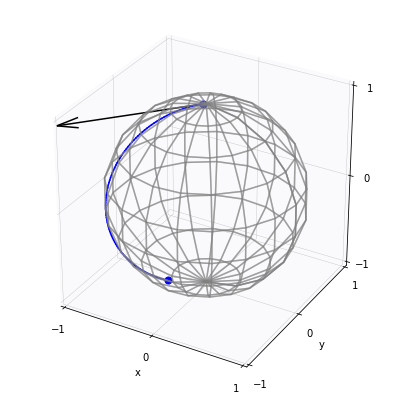

In [10]:
# 2nd order geodesic equation
from src.Riemannian import geodesic
geodesic.initialize(M)

# compute geodesics
xs = M.Exptf(x,v)

# plot
newfig()
M.plot()
M.plot()
M.plotx(xs,v,linewidth = 1.5, s=50)
plt.show()
#plt.savefig("geoeqS2.pdf")

4.0


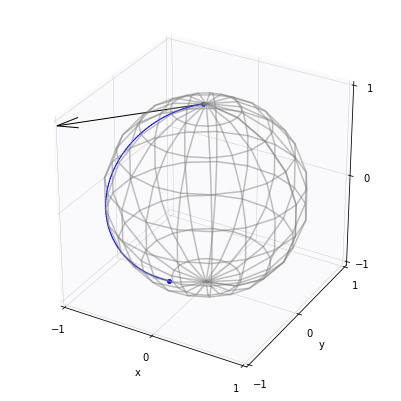

Energy:  [ 4.00160016  4.0032      4.00479759  4.00639099  4.00797824  4.00955737
  4.01112639  4.01268328  4.01422599  4.01575244  4.01726053  4.01874809
  4.02021294  4.02165285  4.02306552  4.02444863  4.02579976  4.02711648
  4.02839624  4.02963647  4.03083449  4.03198755  4.03309283  4.03414738
  4.0351482   4.03609215  4.03697601  4.0377964   4.03854987  4.03923279
  4.03984142  4.04037186  4.04082005  4.04118177  4.04145261  4.04162797
  4.04170306  4.04167286  4.04153214  4.04127541  4.04089691  4.04039064
  4.03975027  4.03896918  4.03804039  4.03695659  4.03571007  4.03429272
  4.03269598  4.03091084  4.02892778  4.02673673  4.02432708  4.02168756
  4.01880627  4.01567057  4.01226706  4.00858154  4.00459886  4.00030297
  3.99567673  3.9907019   3.98535902  3.97962731  3.97348456  3.96690701
  3.95986921  3.95234388  3.94430173  3.9357113   3.92653875  3.91674763
  3.90629866  3.89514941  3.88325406  3.87056301  3.85702255  3.84257439
  3.82715525  3.81069629  3.79312257  3.77

In [11]:
# Hamiltonian dynamics
q = x
print(M.Hf(q,p))

from src.dynamics import Hamiltonian
Hamiltonian.initialize(M)

# Exponential map from Hamiltonian equations
qs = M.Exp_Hamiltoniantf(q,p).T

# plot
newfig()
M.plot()
M.plotx(qs,v)
plt.show()
#plt.savefig("geodesicOnSphere.pdf")

# Parallel Transport

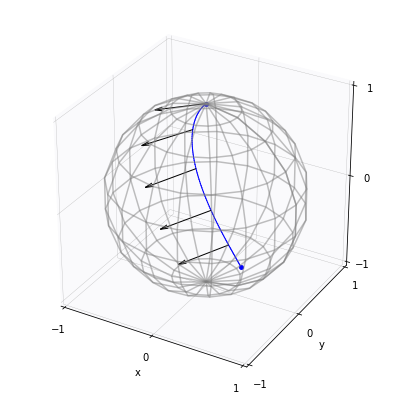

In [17]:
# Parallel transport
from src.Riemannian import parallel_transport
parallel_transport.initialize(M)

v = np.array([-1./2,-1./2])
v = v/M.normf(x,v)
t = np.linspace(0,1,n_steps.get_value())
gamma = np.vstack([t**2,-np.sin(t)]).T
dgamma = np.vstack([2*t,-np.cos(t)]).T

# compute  parallel transport
vt = M.parallel_transportf(v,gamma,dgamma)

# plot result
newfig()
M.plot()
M.plotx(gamma,v=vt,N_vec=np.arange(0,n_steps.eval(),20))
plt.show()
#plt.savefig("partrans.pdf")

# Lie Group

In [2]:
from src.groups.SON import *
G = SON(3)
print(G)

SO(3) (dimension 3)


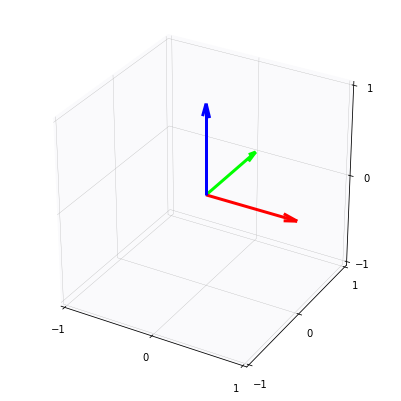

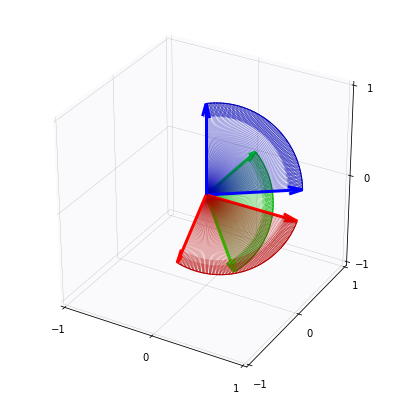

In [13]:
# visualization
from src.plotting import *
newfig()
G.plotg(G.e.eval())
#plt.show()
#plt.savefig("exso3.pdf")

# Geodesic on SO(3):
v=np.array([1,1,1])
xiv=G.VtoLAf(v)
(ts,gsv) = G.exptf(xiv)
newfig()
G.plotg(gsv)
plt.show()
#plt.savefig("geoso3.pdf")

# Projected geodesic on S2:
from src.manifolds.S2 import *
M = S2()
print(M)

newfig()
M.plot()
x= np.array([0,0,1])
M.plotx(M.actsf(gsv.transpose((1,2,0)),x).T)
plt.show()
#plt.savefig("geoso32.pdf")

### Brownian motion:

In [16]:
# setup for testing different versions of stochastic dynamics
q = np.array([1e-6,0,0])
g = G.psif(q)
v = np.array([0,1,1])

from src.group import invariant_metric
invariant_metric.initialize(G)
p = G.sharppsif(q,v)
mu = G.sharpVf(v)
print(p)
print(mu)

from src.group import energy
energy.initialize(G)

[ 0.  1.  1.]
[ 0.  1.  1.]


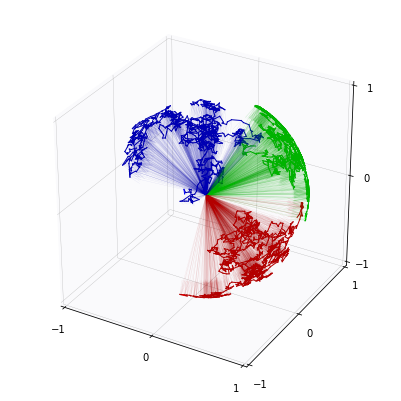

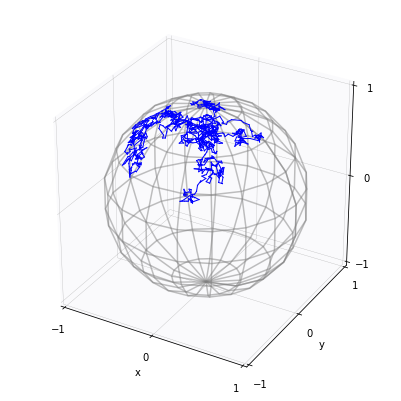

In [17]:
# Brownian motion
from src.stochastics import Brownian_inv
Brownian_inv.initialize(G)

n_steps.set_value(1000)

# Brownian motion on SO(3):
srng.seed(407)
(ts,gsv) = G.Brownian_invf(g,dWsf(G.dim.eval()))
newfig()
G.plotg(gsv,linewidth=0.1,alpha=0.1)
plt.show()
#plt.savefig('stocso3.pdf')

# Projected Brownian motion on S2:
newfig()
M.plot()
x = np.array([0,0,1])
M.plotx(M.actsf(gsv.transpose((1,2,0)),x).T)
plt.show()
#plt.savefig('stocso32.pdf')

# Frame Bundle

In [3]:
from src.Riemannian import metric
from src.framebundle import FM

metric.initialize(M)
FM.initialize(M)

In [4]:
x = np.array([0.,0.])

# element u=(x,nu) in FM, nu being frame for T_xM
# np.linalg.cholesky(M.gsharpf(x)) gives orthonormal basis for T_xM, multiplication scales in given directions
nu = np.dot(np.diag((1.,1.)),np.linalg.cholesky(M.gsharpf(x)))
u = np.concatenate((x,nu.flatten()))

# FM covector p
v = np.array([1.,1.])
px = np.array([4.,4.])#np.linalg.solve(nu,v) # manifold part
pu = np.array([0.,0.,0.,0.]) # frame part
pu2 = np.array([3.,0.,3.,0.])
p = np.concatenate([px,pu])
p2 = np.concatenate([px,pu2])

4.0


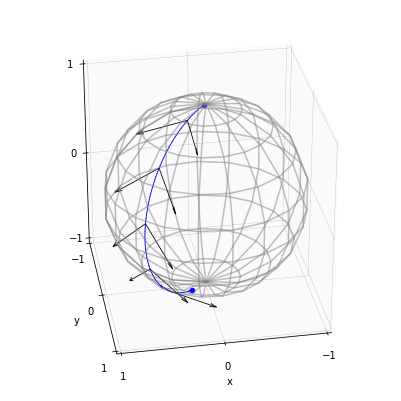

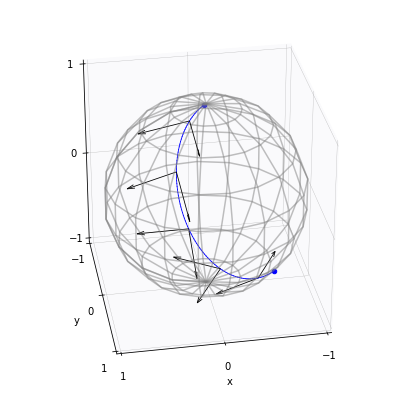

In [5]:
# test Hamiltionian dynamics on FM from sub-Riemannian structure <v,w>_FM=<u^-1(v),u^-1(w)>_R^2
print(M.H_FMf(u,p))

# compute FM geodesic with momentum p:
us = M.Exp_Hamiltonian_FMtf(u,p).T

# plot
newfig()
M.plot(rotate=(30,80))
M.plotFMx(us,N_vec=5,linewidth=1.5,s=50)
plt.show()
#plt.savefig("geodesicOnFM2.pdf")

# compute FM geodesic with momentum p2:
us = M.Exp_Hamiltonian_FMtf(u,p2).T

# plot
newfig()
M.plot(rotate=(30,80))
M.plotFMx(us,N_vec=5,linewidth=1.5,s=50)
plt.show()
#plt.savefig("geodesicOnFMwspin2.pdf")

## Horizontal vector fields

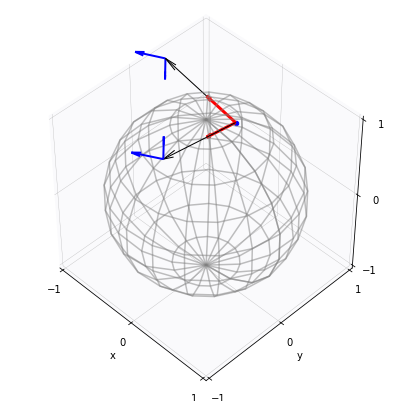

In [61]:
def plotHorizontalFields(u,color='b',color_intensity=1.,linewidth=3.,prevx=None,last=True):
        xM = u[0:M.dim.eval()]
        if xM.shape[0] == M.dim.eval(): # map to manifold
            xM = M.Ff(xM)
         
        ax = plt.gca(projection='3d')
        ax.scatter(xM[0],xM[1],xM[2],color=color)

        x = u[0:M.dim.eval()]
        nu = u[M.dim.eval():].reshape((M.dim.eval(),-1))
        
        # plot frame and horizontal variation
        Hu = M.Horizontalf(u) # horizontal basis fields
        Hnu = Hu[M.dim.eval():].reshape((M.dim.eval(),nu.shape[1],nu.shape[1])) # nu part
        JFx = M.JFf(x)
        Hx = Hu[0:M.dim.eval(),:]  
        
        for j in range(M.dim.eval()):
            HxjM = np.dot(JFx,Hx[:,j])
            nujM = np.dot(JFx,nu[:,j])
            HnujM = np.dot(JFx,np.dot(Hnu,nu[:,j]))
            ax.quiver(xM[0],xM[1],xM[2],nujM[0],nujM[1],nujM[2], pivot='tail',
                      arrow_length_ratio = 0.15, linewidths=1,
                      color='black',normalize=True,length=np.linalg.norm(nujM))
            ax.quiver(xM[0],xM[1],xM[2],HxjM[0],HxjM[1],HxjM[2], pivot='tail',
                      arrow_length_ratio = 0.15, linewidths=3.,
                     color='red',normalize=True,length=0.4)
            for k in range(nu.shape[1]):
                basep = xM + nujM
                ax.quiver(basep[0],basep[1],basep[2],
                          HnujM[0,k],HnujM[1,k],HnujM[2,k], pivot='tail',linewidths=2.,
                          color='blue',normalize=True,length=0.3)

# plot horizontal fields at x = (.1,.1) (vanishes at north pole)
x = np.array([0.1,0.1])
nu = np.array([[-0.5,0],[0,-0.5]])
#nu = np.dot(np.diag((.5,1.)),np.linalg.cholesky(M.gsharpf(x)))
u = np.concatenate((x,nu.flatten()))

newfig()
M.plot(rotate=(45,-45))
plotHorizontalFields(u)
plt.show()
#plt.savefig("Hori.pdf")

## Development

In [62]:
from src.stochastics import stochastic_development
FM.initialize(M)
stochastic_development.initialize(M)

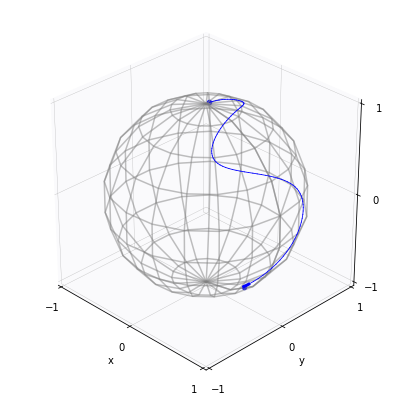

In [78]:
# deterministic development

x = np.array([0.,0.])
nu = np.array([[0.,1.],[1.,0.]])
u = np.concatenate((x,nu.flatten()))

# curve in R^2
t = np.linspace(0,10,n_steps.get_value()+1)
gamma = np.vstack([[20*np.sin(t), t**2 + 2*t]]).T
dgamma = np.diff(gamma, axis = 0)

(ts,us) = M.developmentf(u,dgamma)

# plot with frame
newfig()
M.plot(rotate = (30,-45))
M.plotFMx(us)
plt.show()

x =  [ 0.  0.]
ui =  [[ 0.35355339 -0.35355339]
 [ 0.35355339  0.35355339]]
q =  [ 0.          0.          0.35355339 -0.35355339  0.35355339  0.35355339]


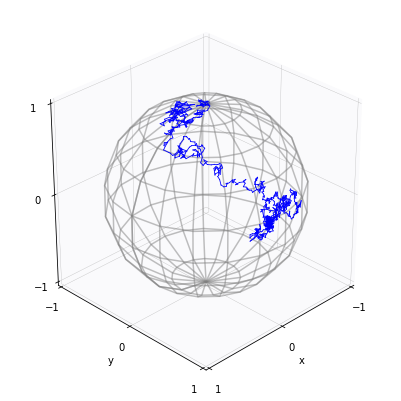

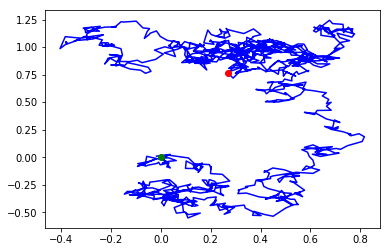

In [92]:
# stochastic development
n_steps.set_value(1000)
x = np.array([0.,0.]).astype(theano.config.floatX)

u = np.array([[1.,-1],[1,1]]).astype(theano.config.floatX)
u = M.gramSchmidt(x,u)
print("x = ", x)
print("ui = ", u)

q = np.hstack([x.flatten(),u.flatten()]).astype(theano.config.floatX)
print("q = ", q)

srng.seed(407)
dWt = np.random.normal(0, np.sqrt(dt.eval()), (n_steps.get_value(),2))
beta = np.array([0.5,0.5])

# test stochastic development
qsv = M.stochastic_developmentf(q,dWt+drift*dt.eval())[1] #M.stoc_devf(q,.8*dWt,drift)
newfig()
M.plot(rotate=(30,45))
M.plotFMx(qsv,linewidth=1.5,s=50)
plt.show()
#plt.savefig("stocdev.pdf")

plt.figure(figsize=(6,4))
Wt = np.cumsum(dWt,axis=0)
#plt.figure()
plt.plot(Wt[:,0],Wt[:,1],'b-')
plt.plot(np.array([0]),np.array([0]),'go')#,markersize=5.)
plt.plot(Wt[-1:,0],Wt[-1:,1],'ro')
plt.show()
#plt.savefig("StocP.pdf")

## Most Probable Path

In [25]:
%cd ..
from src.manifolds.ellipsoid import *
M = Ellipsoid(params=np.array([1.5,0.7,0.7]))

from src.plotting import *

/


q =  [ 0.   0.   0.1  0.3  0.3  0.1]


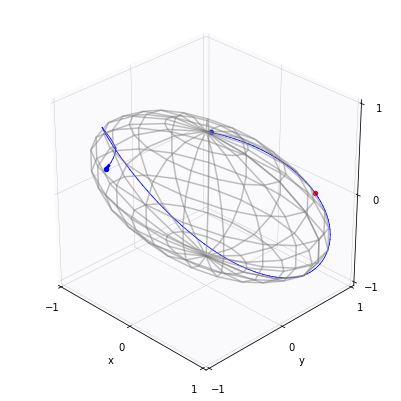

In [30]:
# Riemannian structure
#from src.Riemannian import metric
#from src.framebundle import FM

#metric.initialize(M)
#FM.initialize(M)

# Hamiltonian dynamics
x1 = np.array([0,0])
x2 = np.array([0.5,0.5])

ui0 = np.array([[0.1,0.3],[0.3,0.1]]).astype(theano.config.floatX)
#ui0 = M.gramSchmidt(x1,v0)
q1 = np.hstack([x1,ui0.flatten()]).astype(theano.config.floatX)
print("q = ", q1)

#xi0 = np.array([1,0]).astype(theano.config.floatX)
#xia = np.array([0,0,0,0]).astype(theano.config.floatX)

#p0 = np.hstack([xi0,xia]).astype(theano.config.floatX)
#print("p = ",p0)

# Tangent vector giving the MPP:
#Hor_v = M.Log_FM(q1,x2)

# MPP from q1 to x2:
qsv = M.Exp_Hamiltonian_FMtf(q1,M.flatf(q1,Hor_v)).T

newfig()
ax = plt.gca(projection='3d')
M.plot(rotate=(30,-45))
M.plotFMx(qsv)
xq = M.Ff(x2)
ax.scatter(xq[0],xq[1],xq[2],color='r')
plt.show()
#plt.savefig("MPP.pdf")